# Overview 
In the first step of this project, we will choose a model and then download the data. We use python to open the data and later do simple plots using pandas.
# 1. Exploring netCDF Data
Here we work on an exapmle data from the Copernicus Marine Environment Monitoring Service.
## 1.1 Loading Data
Let's import the packages in jupyter.

In [46]:
import netCDF4
import numpy as np

We create a netCDF.dataset object called f and print a summary information of it: 

In [47]:
f = netCDF4.Dataset('/home/ali/Downloads/GLORYS2V4_ORCA025_201512_gridT.nc')
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    dimensions(sizes): x(1442), y(1021), deptht(75), time_counter(1)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(deptht), float64 time_counter(time_counter), int32 x(x), int32 y(y), float32 votemper(time_counter,deptht,y,x)
    groups: 

## 1.2 Query Dimensions
As we saw before, there are 4 dimensions in this data. Alternatively, we could query the dimensions using the following command: 

In [48]:
dims = f.dimensions  # dims is a dictionary; including name and length
ndims = len(dims)  # the number of dimensions
print("number of dimensions = " + str(ndims))

number of dimensions = 4


Looping over dimensions, we can print the name and the length of each dimension:

In [49]:
for key in dims:
    print ("dimension["+key+"] = " + str(len(dims[key])))

dimension[x] = 1442
dimension[y] = 1021
dimension[deptht] = 75
dimension[time_counter] = 1


## 1.3 Query Global Attributes
There is no globall attribute associated with this data:

In [50]:
gattrs = f.ncattrs()    # gattrs is a dictionary
nattrs = len(gattrs)  # number of attributes
print("number of attributes = " + str(nattrs))

number of attributes = 0


## 1.4 Query Variables
The name of variable objects stored in this file are: 

In [51]:
print(f.variables.keys()) # get all variable names

odict_keys(['nav_lon', 'nav_lat', 'deptht', 'time_counter', 'x', 'y', 'votemper'])


There are seven variables in this file:

In [52]:
vars = f.variables  # vars is a dictionary
nvars = len(vars)  # number of variables
print("number of variables = "+ str(nvars))

number of variables = 7


Looping over the variables, we obtain the dimension and attributes of each variable: 

In [53]:
for var in vars:
    print("------------variable '"+var+"'-----------")
    print("shape = " + str(vars[var].shape))  # dimension of variable; shape is a tuple
    vdims = vars[var].dimensions   # vdim is a tuple
    for vd in vdims:
        print("dimension["+vd+"] = " + str(len(dims[vd])))   # print the length

    # now for each variable, query the attributes
    vattrs = vars[var].ncattrs()    # vattrs is a dictionary
    print("number of attributes = " + str(len(vattrs)))
    for vat in vattrs:
        print("attribute ["+vat+"] = " + str(getattr(vars[var], vat)))

------------variable 'nav_lon'-----------
shape = (1021, 1442)
dimension[y] = 1021
dimension[x] = 1442
number of attributes = 8
attribute [units] = degrees_east
attribute [valid_min] = -180.0
attribute [valid_max] = 180.0
attribute [long_name] = Longitude
attribute [nav_model] = Default grid
attribute [standard_name] = longitude
attribute [add_offset] = 0.0
attribute [scale_factor] = 1.0
------------variable 'nav_lat'-----------
shape = (1021, 1442)
dimension[y] = 1021
dimension[x] = 1442
number of attributes = 8
attribute [units] = degrees_north
attribute [valid_min] = -77.0104751587
attribute [valid_max] = 89.9478683472
attribute [long_name] = Latitude
attribute [nav_model] = Default grid
attribute [standard_name] = latitude
attribute [add_offset] = 0.0
attribute [scale_factor] = 1.0
------------variable 'deptht'-----------
shape = (75,)
dimension[deptht] = 75
number of attributes = 7
attribute [units] = m
attribute [positive] = down
attribute [valid_min] = 0.505760014057
attribute [

We can access to the temperature variable for instance: 

In [54]:
temp = f.variables['votemper']  # temperature variable
temp

<class 'netCDF4._netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degree_Celsius
    missing_value: 9.96921e+36
    valid_min: -20.0
    valid_max: 42.0
    long_name: Temperature
    short_name: votemper
    coordinates: 
    standard_name: 
    online_operation: N/A
    axis: 
    scale_factor: 1.0
    add_offset: 0.0
    savelog10: 0.0
unlimited dimensions: time_counter
current shape = (1, 75, 1021, 1442)
filling off

# 2. Basic Ploting netCDF
Here we use xarray toolkit, an pandas-compatible Python package, to work on mutidimensional netCDF data.
## 2.1 Opening Data
We are going to import the package and import the use `xarray.open_dataset` which is an in-memory representation of a netCDF file.

In [55]:
import xarray as xr
ds = xr.open_dataset('/home/ali/Downloads/OceansData/GLORYS2V4_ORCA025_199306_gridT.nc')

## 2.2 Renaming Variables

In [56]:
ds = ds.rename({'votemper':'Temperature','deptht':'Depth','time_counter':'Time'})
temp = ds['Temperature']
temp

<xarray.DataArray 'Temperature' (Time: 1, Depth: 75, y: 1021, x: 1442)>
[110421150 values with dtype=float64]
Coordinates:
  * Depth    (Depth) float32 0.50576 1.55586 2.66768 3.85628 5.14036 6.54303 ...
  * Time     (Time) datetime64[ns] 1993-06-16
  * x        (x) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 ...
  * y        (y) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 ...
Attributes:
    units:             degree_Celsius
    valid_min:         -20.0
    valid_max:         42.0
    long_name:         Temperature
    short_name:        votemper
    standard_name:     
    online_operation:  N/A
    axis:              
    savelog10:         0.0

## 2.3 Slicing Temperature Data

In [57]:
temp = temp.isel(Depth=[0,10,20,30,40,50], x=slice(880,980), y=slice(700,800), Time=0)
temp

<xarray.DataArray 'Temperature' (Depth: 6, y: 100, x: 100)>
array([[[  8.4752  ,   8.442533, ...,  15.920401,  15.957733],
        [  8.130533,   8.052967, ...,  15.869101,  15.936567],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[  5.8065  ,   5.3909  , ...,  15.902734,  15.9391  ],
        [  6.042767,   5.287867, ...,  15.858001,  15.922667],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       ..., 
       [[       nan,        nan, ...,   8.613334,   8.6335  ],
        [       nan,        nan, ...,   8.713133,   8.752566],
        ..., 
        [       nan,        nan, ...,        nan,        nan],
        [       nan,        nan, ...,        nan,        nan]],

       [[       nan,        nan, ...,   3.747433,   3.769866],
        [       nan,        nan, ...,   3.7499  ,   3.771266

## 2.4 Ploting Data
Xarray ploting functionality is very similar to the Python famous `matplotlib` and it must be installed. First, set-up to have matplotlib use its jupyter notebook backend:   

In [58]:
%matplotlib notebook

<IPython.core.display.Javascript object>


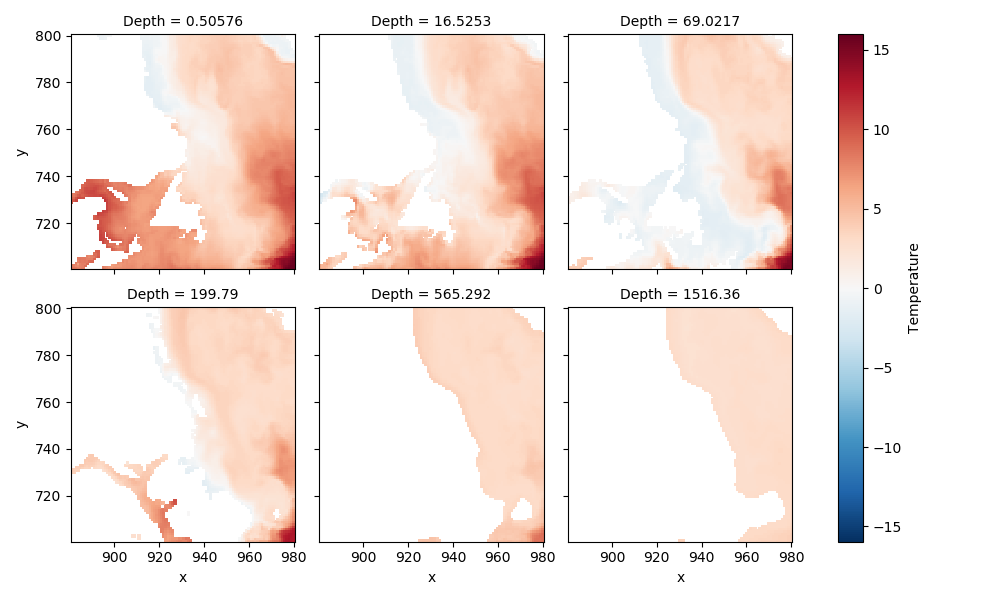

In [59]:
g_simple = temp.plot(x='x', y='y', col = 'Depth', col_wrap=3)

## 2.5 Ploting from Multiple netcdf Files

<IPython.core.display.Javascript object>


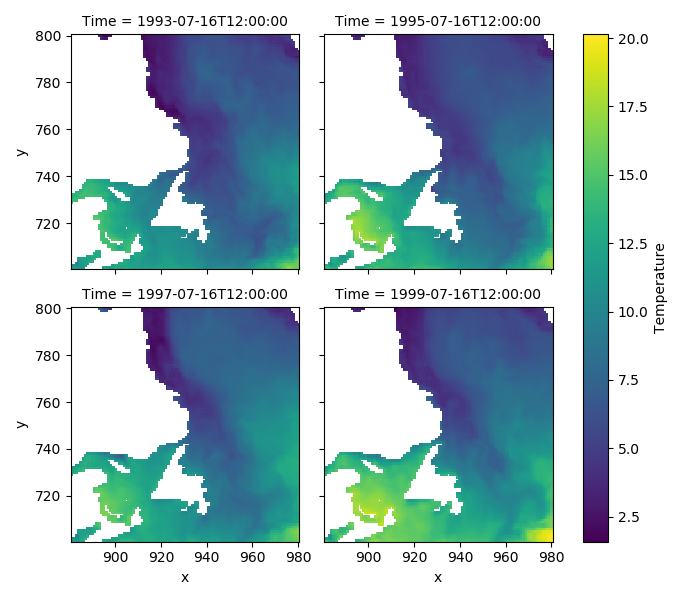

In [60]:
# Read all the files
ds = xr.open_mfdataset('/home/ali/Downloads/OceansData/*.nc')

# Renaming variables
ds = ds.rename({'votemper':'Temperature','deptht':'Depth','time_counter':'Time'})
temp = ds['Temperature']

# Slicing the data
temp = temp.isel(Depth=0, x=slice(880,980), y=slice(700,800), Time=[6,30,54,78])

# Ploting arbitrary time
temp.plot(x='x', y='y', col = 'Time', col_wrap= 2)